# Neural Network Fundamentals

This blog post is a guide to help readers build a neural network from the very basics. It starts with an introduction to the concept of a neural networks concept and its early development. A step-by-step coding tutorial follows, through which relevant concepts are illustrated. Later in the post, there is also an introduction on how to build neural networks in Keras. Finally, the reader will find instructions on how to deploy the model via an API to make it accessible to anyone interested on it.

## Neural Networks and its early development

As the name tells, the idea of neural networks is inspired by how neurons work in the human brain. It is, however, crucial for the readers to know that despite the original motivation of neural networks, the NN models being used today have little resemblance to what a human brain does ???(Warner and Misra, 1996).  In its basic form, neural networks are composed of nodes interconnected to each other in several layers. The basic form of a NN would include an input, a hidden and an output layer. The number of nodes and layers can add to the complexity and efficiency of neural networks.  

The McCulloch-Pitts model of neuron in 1943 was one of the earliest simplified version of neural networks. It consisted of a simple neuron which received a weighted sum of inputs and output either zero if the sum was smaller than a threshold or one when it was greater than the threshold. This idea is called firing and is an interesting analogy to what an actual neuron does. Later on, in the early 1960s, Rosenblatt introduced the simple perceptron model. This was a developed version of the McCulloch-Pitts with an input and output layer. However, the linear separablilty limitation ???(Minsky and Papert ,1969) of simple perceptron took away the research interest in neural networks for a while. In the early 1980s, the Hopfield model of content-addressable memory, however, motivated researchers in the area again and later on with the introduction of backpropagation learning algorithm, interest in neural networks research soared. Nowadays, neural nets are used in a variety of applications to tackle problems such as classification, speech and image recognition, control systems and predictions.


## Literature Review

Mention:
    * http://neuralnetworksanddeeplearning.com/index.html                  Michael Nielsen / Dec 2017
    * http://www.cristiandima.com/neural-networks-from-scratch-in-python/  CRISTIAN DIMA
    * [Rashid, 2016](https://ebook4expert.com/2016/07/12/make-your-own-neural-network-ebook-free-by-tariq-rashid-epubmobi/)]    

# NN from scratch
## Problem Statement
The best way to understand how neural networks work is to build one yourself from scratch.
The understanding becomes even more comprehensive if there is a particular problem that can be solved using NNs. Therefore let's start our work by taking a look at the picture below.

<img src="pics/problem.png" alt="Drawing" style="width: 600px;"/>

There are handwritten numbers that you want computer to correctly classify. This would be an easy task for a person but at least for a long period of time was an extremely complicated one for a machine. 

Even though the computer is faster than the human brain in numeric computations, the brain outperforms the computer in some other tasks. Many of those tasks are related to the human ability for sentience (which is a concept different from intelligence). The trick is to find a way, so that the computer could apply its numeric computation skills to solve these later tasks (at least to some degree).

The first step would be to limit the scope of the task. In our particular case the broad task of image recognition will be addressed as a classification problem - a task of giving an object a label from a given set of labels.

As we will see during the process of building our own NN, its output is based almost exclusively on application of linear algebra methods. Despite the name (which is sometimes related to the fear of artificial intelligence), neural networks in fact are much more related to statistical methods (like regression analysis or curve fitting) than to the way human brain works [[Stuart Reid, 2014](http://www.turingfinance.com/misconceptions-about-neural-networks/)]. 

NNs are inspired by human brain only to certain extent. For instance the main element that makes them similar is a multilayer net structure of simple elements that are connected in some way, receiving and transmitting information. But the structure of the human brain is much more complicated, besides it is self-organizing and adaptive in contrast to the fixed manually designed architecture of a NN. Hence, there is a good reason to stop being afraid of neural networks and instead to create one ourselves.

<img src="pics/neurons_net3.png" alt="Drawing" style="width: 500px;"/> [Source: [Pixabay.com](https://pixabay.com/)]

## Schematic Representation

A complex multilayer structure that all neural networks have in common in a simplified way can be depicted using the following picture.

<img src="pics/neural_network1.jpg" alt="Drawing" style="width: 800px;"/>

All we need in order to implement such a structure is base Python and numpy, a library for numerical computation, which we will be using to do linear algebra. 

First let's determine the elements of a neural network depicted above: nodes, layers, weights across nodes and activation functions.

**Nodes.** A node is basically a point where data points are received, processed and then transferred to the node. A node could be either an endpoint or a redistribution point or even both when iterations are done through the learning algorithm. The number of nodes to use is optional.

**Layers.** A layer consists of one or several nodes. The initial layer in the network is called the input layer and it is the entry point through which the data is fed into the neural net. The middle layers are called hidden layer because the computation results of them are not directly visible to someone interacting with the neural net. In the hidden layers, which can range from one to thousands, the features are transformed and most of the structure (both linear and nonlinear) is captured. Finally, there is the final layer, from which results are output. The nodes in each layer are fully interconnected to the ones in the next and the previous layers. 

In our case we have a structure with 3 layers: input, output and one hidden layer. The number of nodes in the input  ("i_n"), hidden ("h_n") and output ("o_n") layers are 3, 5 and 2 respectively. In Python, such a structure can be represented in the following way:

In [1]:
# Load the package to work with numbers:
import numpy as np

# Determine the structure of the NN:
i_n = 3
h_n = 5
o_n = 2

**Weights.** In order to transfer an input data point to the next layer, a predetermined number (called weight) is stored in each connection from the sender node to the receiver node. Each weight accounts for the impact between the interconnected nodes.

Initially, we assign weights between nodes in neighboring layers randomly. This is needed only for the sake of initializing the structure. Later these weights will be changed in order to solve our classification problem. The weight updating will be better described in the following sections.

Neural nets will have n-1 matrices of weights, where n is the number of layers in the NN. You can imagine these weight matrices sitting between two layers representing the strength of the connection between every single node of neighbouring layers. Thus, each of these matrices will be of size f x p, where p is the number of nodes in the preceding layer and f is the number of nodes in the following layer.

This becomes more clear once you check the code below that creates 2 matrices of weights:
* matrix of weights between input and hidden layers ("w_i_h") - 5 by 3 matrix
* matrix of weights between hidden and output layers ("w_h_o") - 2 by 5 matrix.

Such a dimensions of matrices are necessary in order to accomplish matrix and vector multiplications that are done in the following stages.

In [2]:
# Randomly define the weights between the layers:
w_i_h = np.random.rand(h_n, i_n) # create an array of the given shape and populate it with random values.
w_h_o = np.random.rand(o_n, h_n) 

# Show matrices of randomly assigned weights:
w_i_h
# w_h_o # uncomment this line in order to see the values for w_h_o.
# Use Cmd + / in MacOS and CTRL + / in MS Windows as a shortcut to comment/uncomment lines.

array([[ 0.90777842,  0.73311418,  0.11434952],
       [ 0.98934683,  0.76666849,  0.69625713],
       [ 0.30095531,  0.72558061,  0.50910764],
       [ 0.96351366,  0.65874791,  0.06047322],
       [ 0.94092134,  0.3455386 ,  0.83219342]])

**Activation Function.** The remaining element of the NN's structure is an activation function - a function which transforms an input data point that it receives from the previous nodes to an output value which will be the input for the nodes in the next layer. The activation function plays an important role in the efficiency of the neural network as it accounts for non-linearity of data. 
It is to certain extent inspired by the concept of "firing", which means that neurons "fire" or transmit information further only if the input surpasses certain threshold. The simplest activation function can be represented by a step function as on the picture below!!!.

<img src="pics/step_function.png" alt="Drawing" style="width: 700px";/> [Source: [Research Gate](https://www.researchgate.net/figure/Three-different-types-of-transfer-function-step-sigmoid-and-linear-in-unipolar-and_306323136)]

In our NN, we will use a slightly more elaborate activation function, the sigmoid function (logistic), which allows for more efficient use of the input data. Extended description of various activation functions, their benefits and disadvantages is given in sections below.

In [3]:
# Determine activation function:
def sigmoid(x):
    # np.exp() calculates the exponential
    # of all elements in the input array.
    return 1 / (1 + np.exp(-x)) 


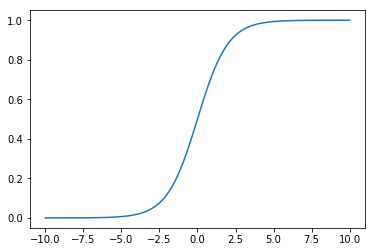

In [5]:
# Draw activation function:
import matplotlib.pyplot as plt

# return 100 evenly spaced numbers over an interval from -10 to 10.
x = np.linspace(-10, 10, 100) 
# plot sigmoid function for sampled values:
plt.plot(x, sigmoid(x)) 
plt.show()

## Data Inspection

By now we have collected all the elements of the NN. Can we use this structure in order to solve the classification problem stated in the beginning? In order to answer this question we need first to get a better understanding of the data at our disposal. 

We are trying to check whether NN is able to solve the classification problem using a collection of 70 000 handwritten numbers. Each of this handwritten number is represented as 28x28 image. 

The original source of the data is "THE MNIST DATABASE". A detailed description of the dataset is available at
http://yann.lecun.com/exdb/mnist/. There you can also find, for example, a summary of the performance results achieved by various classification algorithms.

For the sake of simplicity we suggest obtaining the data from another source:
https://pjreddie.com/projects/mnist-in-csv/. Here the original images are saved in CSV, which allows to work with them directly.

For the purposes of demonstration below we use a smaller dataset (100 images), which will be expanded at a later stage.

In [6]:
# Load the data:
raw_data = open("data/mnist_train_100.csv", 'r') # "r" stands for "read only" mode.
data = raw_data.readlines() # read all the lines of a file in a list.
raw_data.close() # remove temporal file from the environment in order to save memory.

In [7]:
# Inspect the data - check the number of observations:
len(data) # length of the object.

100

In [8]:
# Inspect a particular observation of the data:
data[0] # show observation number 0 from the list (remember that in Python numbering starts from 0).

'3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,254,254,254,254,255,209,126,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,119,230,233,241,216,248,254,254,239,223,132,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,25,38,0,48,126,245,244,251,254,243,198,131,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,113,192,254,254,235,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,29,226,254,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,107,254,249,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,186,254,254,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,96,216,254,228,100,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,89,212,254,254,210,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,213,255,254,247,66,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,254,21

* A particular observation looks like a string of 785 elements (label of the image + 784 elements for each pixels of a 28x28 image). 
* Each element representing a pixel is a number from 0 to 255 (from white to black color).
* The first element in the line is the label of the image and therefore is a number from 0 to 9.

Using `matplotlib`, we can also reconstruct the original image based on the data about each pixel in the string.

In [9]:
# Load the package to plot the data:
import matplotlib.pyplot as mpp
%matplotlib inline

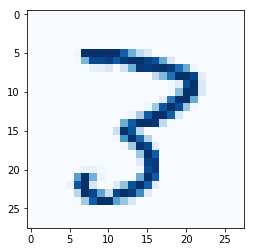

In [10]:
# Plot the data:
observation = data[0].split(',') # break down observation number 0 (comma is used to identify each element).
image = np.asfarray(observation[1:]).reshape((28,28)) # take all the elements starting from the element 1 
# (exclude element number 0, that corresponds to the label) and reshape them as an array with dimension 28 by 28.
mpp.imshow(image, cmap='Blues', interpolation='None') # show the plot of this array using blue pallete.

In [11]:
# Save an observation of the data as an input to work with:
input = np.array(np.asfarray(observation[1:]), ndmin=2).T # save necessary elements in a vertical vector shape.

## Fitting the structure of the NN to the Data

Let's take a look once again at the NN's structure we have created at the beginning of the tutorial.

<img src="pics/neural_network1.jpg" alt="Drawing" style="width: 800px;"/>

After inspecting the data, we can conclude that the structure with 3-5-2 nodes is probably not optimal and therefore should be updated in order to fit the data we have and peculiarities of the classification problem: 

* For each observation we have 784 elements as an input (label element is excluded). Accordingly, instead of 3 input nodes we should better have 784. 
* Similarly, as we have 10 different options for the outcome (handwritten numbers are labeled from 0 to 9) the number of output nodes should be 10 instead of 2. 
* We also change the number of hidden nodes from 5 to 90. Such a number has been assigned based on some proportionality assumptions which will be checked later: 90 is 9 times higher than 10 and approximately 9 times smaller than 784.

In [12]:
# Determine the new structure of the NN:
i_n = 784
h_n = 90
o_n = 10

As we have new structure of the NN we should reassign the weights - now the size of each weight matrix will increase as we have more nodes in each layer.

In [13]:
# Determine the weights:
w_i_h = np.random.rand(h_n, i_n)
w_h_o = np.random.rand(o_n, h_n)

So far we have not used the first element of our observation - the label. It will be necessary to compare the predictions of the NN to the real state of the world and to train the NN to make correct predictions. The target should therefore have the same shape as the output layer of the NN, so that they could be comparable. We can represent the label as a vector of n binary (0 or 1) elements (n corresponds to the number of nodes in the output layer). There should be only one element equal to 1 and the position of this element should correspond to the index number of the label we want to predict.

In [14]:
# Create target array:
target = np.array(np.zeros(o_n), ndmin=2).T
target[int(observation[0])] = 1 # int() method returns an integer object from any number or string.

In [15]:
# Inspect how the target looks like (remember that the label of observations is 5):
target

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [16]:
# Show the sizes of matrices of weights, input and target vectors:
w_i_h.shape, input.shape, w_h_o.shape, target.shape

((90, 784), (784, 1), (10, 90), (10, 1))

## Feedforwarding

Once we have the structure of the NN updated for the specific task of classifying the numbers depicted on the images, we can run our network in order to get the first predictions that will be represented by a vector of 10 elements. This vector in its turn can be compared to the target.

To run the NN, i.e. to feed forward our input data in order to get some predictions, we should follow certain steps:

1. Multiply an input vector by a matrix of weights that connects it with the next layer;
2. Transform the result using activation function;
3. Use the output obtained in the 2nd step as an input vector for the next layer.

A sequence of this steps should be repeated n-1 times (where n corresponds to the number of layers). The output of the previous layer will always be the input vector for the next layer. In our case the procedure will happen twice.

In the picture bellow !!!, you can see the procedure necessary to obtain the output of the hidden layer. The result of matrix multiplication here is called "Hidden_Input". Result of the transformation of "Hidden_Input" through activation function is called "Hidden_Output".

This output will be used as the input vector that should be multiplied by the next weight matrix and transformed through activation function in order to calculate the final output of the NN. If our NN would have more than one hidden layer, the procedure would be repeated more times.

<img src="pics/multiplication.png" alt="Drawing" style="width: 800px;"/>

<img src="pics/activation.jpg" alt="Drawing" style="width: 800px;"/>

Below you can see the code implementation of all the steps for all layers of the NN.

In [17]:
# Calculate the output of hidden and output layers of our NN:
h_input = np.dot(w_i_h, input) # dot() performs matrix multiplication; "h_input" stands for "Hidden_Input".
h_output = sigmoid(h_input) # "Hidden_Output" - result after activation function.
o_input = np.dot(w_h_o, h_output) # "Output_Input" - input used for the next layer.
o_output = sigmoid(o_input) # "Output_Output" - final output of the NN.

In [18]:
# Show intermediate data and output:
# Uncomment the line of interest in order to see the the corresponding object.
# h_input
# h_output
# o_input
o_output

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

## Data treatment good practices

Once we check the output of the NN and the results of each performed step, we can observe that already at the stage of the h_output all the data converts to a vector in which all the values are equal to 1. Such a vector does not provide us with any helpful insight. Apparently, something is wrong with what we have done so far. There could be several reasons for the problem we face.

**First of all, let's take a look at our sigmoid function once again:**

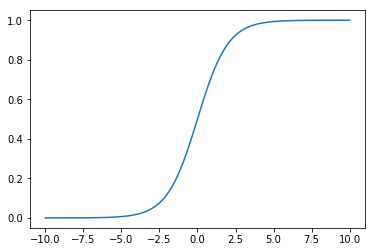

In [19]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.show()

As we can see the output of the sigmoid function will be almost identical once we feed a number bigger than 2. Similarly there is no significant difference between the outputs if numbers used are smaller than -2. Hence the application of sigmoid function to the original data leads to a loss of valuable information. The NN has problems learning something from the inputs, which are almost undifferentiable.  

One solution is to transform the input we have. Ideally we should have our data in a range between 0 and 1. It is also desirable to avoid zeros as inputs, because the output of a zero input will always be zero, no matter how large the weights are, in which case the NN will not be able to use this input to learn.

We can perform a transformation of the original data as the one coded below:

In [20]:
# Good practice transformation of the input values:
input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T 
# Our values in our input vector are in the range from 0 to 255. Therefore we should divide input vector by 255, 
# multiply it by 0,99 and add 0,01 in order to get values in the range from 0,01 to 1.

# Good practice transformation of the target value:
target = np.array(np.zeros(o_n) + 0.01, ndmin=2).T
target[int(observation[0])] = 0.99

**Secondly, we can check our way to randomly assign initial weights:**

Let's take a look once at the function we used to randomly assign weights:

In [21]:
np.random.rand(3, 5)

array([[ 0.22583725,  0.12109248,  0.02590624,  0.12690234,  0.62018663],
       [ 0.81179976,  0.46311266,  0.71892529,  0.44099911,  0.43754171],
       [ 0.49648974,  0.30002541,  0.04783774,  0.69393036,  0.58613769]])

As we can see, all the weights are positive, while the actual relationship between the features in the data and the values of the output vector can be negative. Hence, the way we employ to assign random weights should allow for negative weights too.

Below there are too alternatives how this can be implemented in Python.


In [22]:
# Good practice for initial weights assignment:
    
alternative1 = np.random.rand(3, 5) - 0.5 
# or
alternative2 = np.random.normal(0.0, pow(3, -0.5), (3, 5)) 
# arguments: Mean of the distribution, Standard deviation of the distribution, Output shape.
# Second approach is better as it takes in account the standard deviation 
# that is related to the number of incoming links into a node, 1/√(number of incoming links).

# alternative1
alternative2

array([[ 0.06685916, -0.17391294,  0.14547523, -0.48137787,  0.03086745],
       [-0.06936764,  0.21306989, -0.89904039, -0.99947961,  0.22077087],
       [ 0.85971567, -0.21178824, -0.26656818, -0.30837416,  0.92054582]])

In [23]:
# Define the weights in accordance with the best practice:
w_i_h = np.random.normal(0.0, pow(h_n, -0.5), (h_n, i_n))
w_h_o = np.random.normal(0.0, pow(o_n, -0.5), (o_n, h_n))

Now that we have all the elements assigned in accordance with good practices, we can feedforward the data once again.

In [24]:
# Run NN to get new classification of the particular observation:
h_input = np.dot(w_i_h, input)
h_output = sigmoid(h_input)
o_input = np.dot(w_h_o, h_output)
o_output = sigmoid(o_input)
o_output

array([[ 0.07373055],
       [ 0.14887152],
       [ 0.96694188],
       [ 0.70200766],
       [ 0.24295729],
       [ 0.22478192],
       [ 0.75462671],
       [ 0.66361842],
       [ 0.37623992],
       [ 0.47408493]])

## First evaluation of the results

Once we have obtained the output of the NN, we can compare it to the target.

In [25]:
# Calculate the errors of the classification:
o_errors = target - o_output
o_errors

array([[-0.06373055],
       [-0.13887152],
       [-0.95694188],
       [ 0.28799234],
       [-0.23295729],
       [-0.21478192],
       [-0.74462671],
       [-0.65361842],
       [-0.36623992],
       [-0.46408493]])

The result we would like to achieve should look like as a vector of values where almost all values are negligibly small except for the one value that has the position in the vector corresponding to the index of the true label. 

It is not the case now. Nevertheless one should remember that so far all the weights have been assigned randomly and no training has been performed yet. In any case, it is not a vector of ones anymore, which an improvement.

Thus, we can proceed to the next stage, which is to find out where the errors come from and how they can be minimized.

## Backpropagation

Back propagation is a learning algorithm which aims to minimize the errors/cost function of the NN. Through this learning algorithm, the random weights and biases which were initially given to the network will be optimized to give the best output.

Output of each node is the sum of the multiplications of the output of previous nodes by certain weights. Therefore we can associate how much error is coming with every weight and how much error has been brought from each particular node from the previous layer.

To understand this better it is worth imagining the following example:
* node 1 in the output layer of the NN should be equal to 0,01 ;
* instead the NN is providing us with 0,8.

In this case we should do the following:

1. Calculate the error of the node (-0,79 in our example);

2. Calculate how much error has been brought by every link to this node.

For instance if weight w<sub>11</sub> is 0,6 and w<sub>21</sub> is 0,4 then they are associated with an error of -0,79 multiplied by 0,6 and -0,79 multiplied by 0,4 respectively (see Pictures below).

<img src="pics/bp.jpg" alt="Drawing" style="width: 800px;"/>

After calculation of how much error is associated with every weight we can obtain the errors for the nodes in the proceeding layer.

For instance error term for node 1 in the hidden layer will we equal to:

the sum of errors associated with all the weights (w<sub>11</sub> and w<sub>12</sub> in our case) that link this node with the next layer. (see Picture below).

Once we repeat this procedure for all the nodes in all layers we can find out how much every node should be changed.

To do so in Python we just need to make multiplication of vector that contain errors by corresponding matrix of weights.

In [26]:
# Find the errors associated with hidden layer output:
h_errors = np.dot(w_h_o.T, o_errors)
h_errors[0:10] # errors in the hidden layer - show the first 10 nodes out of 90.

array([[ 0.39443768],
       [-0.16865836],
       [ 0.0304721 ],
       [-0.85442941],
       [-0.19828127],
       [-0.53651297],
       [ 0.52033741],
       [-0.2781908 ],
       [-0.07071894],
       [-1.63579796]])

## Gradient descent

Gradient descent is one the most popular algorithms to optimize the neural networks. The name gradient descent is rooted in the procedure where the gradient is repeatedly evaluated to update the parameters. The objective of the gradient descent is to find weight parameters that will minimize the cost function.

To understand the concept of gradient descent we should ask ourselves the following question: What can be done to improve the weights we have assigned randomly at the beginning, so that the overall result improves? 

To change the output of any node we should change the weights that connect it with the previous layer. Basically we want to find out how much error in every node changes once we change associated weights. Next we want to select the weights that would lead to a minimal error in the output layer. That can be achieved by differentiation of the cost function and search for its minimum.

Given multidimensionality of the function, which we need to differentiate, the search for its minimum can be a complicated task. This task is similar to some extent to the search of the path in the darkness from the top of a mountain to its valley. Because it is dark it is almost impossible to reach the valley immediately. The only way to achieve the goal is by exploring the neighbourhood (the radius you are able to see) and tacking small steps in the direction that leads downhill and constantly updating the path for the next steps. This process is illustrated below:

In [27]:
%%html
<iframe src="https://giphy.com/embed/8tvzvXhB3wcmI" width="1000" height="400" frameBorder="0" class="giphy-embed" allowFullScreen></iframe>
<p><a href="https://giphy.com/gifs/deep-learning-8tvzvXhB3wcmI">[Source: Giphy.com]</a></p>

Mathematically the differentiation process can be illustrated on the example of weights between output and hidden layers (Who). The same process but with corresponding values should be applied for the weights between input and hidden layers (Wih).

As it can be seen from the formulas !!! the error we want to minimize (E) can be defined as the sum of squared differences between the target (Tn) and output (On) values of the NN. The sum of differences for all the nodes in the layer is relevant but when doing calculation for a particular node this sum can be omitted - only the difference between particular output (Oo) and target (Oo) matters.

Target value is constant. Output value depends on weights and is obtained after applying sigmoid function to the sum of inputs (outputs of the previous layer - Oh) multiplied by corresponding weights (Who).

<img src="pics/formula2.png"  alt="Drawing" style="width: 1000px;"/>

The formula for derivative of the sigmoid function is provided below !!! It is necessary to keep in mind that the sum to which we apply sigmoid function also depends on the change of weights (Who). Therefore one should follow the chain rule for derivation.

<img src="pics/formula3.png"  alt="Drawing" style="width: 1000px;"/>

The formula we derive is for one particular node. We can however apply it to all the nodes in the layer. In order to do so the only thing we need is to consider this formula in matrix notation. Thus, necessary update of weights linked to all the nodes in a layer will be calculated.

After solving the minimization problem we can update the weights we have assigned before.

<img src="pics/formula5.png"  alt="Drawing" style="width: 1000px;"/>

In code this can be represented as follows:

In [28]:
# Update the matrix for weights between hidden and output layers:
w_h_o += np.dot((o_errors * o_output * (1.0 - o_output)), np.transpose(h_output))
# Update the matrix for weights between input and hidden layers:
w_i_h += np.dot((h_errors * h_output * (1.0 - h_output)), np.transpose(input))

## Learning Rate

Now, there is something else, we should add in the weights updating procedure. If we completely change our weights with every new observation - our model learns to predict only the last input. Instead of updating weights 100 % every time we can change them only partially - this way every new observation will bring some new knowledge while the previous one will still be in memory even though updated to certain extent. The bigger the learning rate the more importance has the last observation, the smaller it is the more important is all the previous knowledge. The smaller the steps - the more accurate will be the prediction. At the same time it might take more time to learn.

<img src="pics/learning_rate.png" alt="Drawing" style="width: 600px;"/> [Source: "Business Analytics & Data Science Course by Professor S. Lessmann, Chapter 5:
Artificial Neural Networks"]

Below is the code for weight's update procedure with learning rate included.

In [29]:
# Define the learning rate:
l_r = 0.3

# Update the weights for the links between the hidden and output layers:
w_h_o += l_r * np.dot((o_errors * o_output * (1.0 - o_output)), np.transpose(h_output))
# Update the weights for the links between the input and hidden layers:
w_i_h += l_r * np.dot((h_errors * h_output * (1.0 - h_output)), np.transpose(input))

## Training

So far we have been working with one particular observation. Let's put all the steps done before in a for-loop, so that we can perform them for all observations in our training set. More observations will allow the NN to learn from more information. Every time a new observation is feedforwarded, the error term backpropagated and the cost function minimized, the matrices of weights become more capable to label yet unknown observations.

In [30]:
for i in data:
    observation = i.split(',')
    input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T
    target = np.array(np.zeros(o_n) + 0.01, ndmin=2).T
    target[int(observation[0])] = 0.99

    h_input = np.dot(w_i_h, input)
    h_output = sigmoid(h_input)
    o_input = np.dot(w_h_o, h_output)
    o_output = sigmoid(o_input)

    o_errors = target - o_output
    h_errors = np.dot(w_h_o.T, o_errors)
    
    w_h_o += l_r * np.dot((o_errors * o_output * (1.0 - o_output)), np.transpose(h_output))
    w_i_h += l_r * np.dot((h_errors * h_output * (1.0 - h_output)), np.transpose(input))

    pass

## Second evaluation of the results

Once we have trained the model with 100 observations we can test it with new data it has never seen. After loading the test set we can first work with a particular observation to get an intuition about how good our NN can solve considered classification problem. 

In [31]:
# Load the mnist test data CSV file:
raw_data_test = open("data/mnist_test.csv", 'r')
data_test = raw_data_test.readlines()
raw_data_test.close()

7


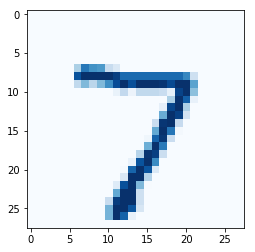

In [32]:
# Check a particular observation:
observation = data_test[0].split(',')
# Print the label:
print(observation[0])
# Image the number:
image = np.asfarray(observation[1:]).reshape((28,28))
mpp.imshow(image, cmap='Blues', interpolation='None')

In [33]:
# Use this observation as an input and run NN with it:
input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T
h_input = np.dot(w_i_h, input)
h_output = sigmoid(h_input)
o_input = np.dot(w_h_o, h_output)
o_output = sigmoid(o_input)

o_output

array([[ 0.05086044],
       [ 0.01692228],
       [ 0.03306648],
       [ 0.01855151],
       [ 0.17733202],
       [ 0.01942656],
       [ 0.01083799],
       [ 0.33279056],
       [ 0.13214786],
       [ 0.05988345]])

In [34]:
# Get the prediction of NN for this test observation:
label = np.argmax(o_output)
label

7

After working with a particular observation from the testset we can label all of them and evaluate the accuracy of our NN.

In [35]:
# Test the neural network using all test dataset:

score = [] # create a list in which the predictions of the network will we saved.

# Go through all the observations in the test data set:
for i in data_test:
    observation = i.split(',')
    expected = int(observation[0])
    input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T

    h_input = np.dot(w_i_h, input)
    h_output = sigmoid(h_input)
    o_input = np.dot(w_h_o, h_output)
    o_output = sigmoid(o_input)

    label = np.argmax(o_output)

    if (label == expected):
        score.append(1)
    else:
        score.append(0)
        pass
    
    pass

In [36]:
# Calculate the performance score, the fraction of correct answers:
score_array = np.asarray(score)
print ("performance = ", score_array.sum() / score_array.size)

performance =  0.3959


It is several times better than naive, which would be 0.1 (given that we have 10 levels of the categorical variable we have to classify). Can we do better?

## Further Improvements

**Training with several epochs**

One way to improve the results of the NN is to train it more. For instance we can feedforward the same 100 observations more than once. Despite the fact that these are the same observations, longer training allows NN to accumulate more knowledge. Keep in mind that due to the presence of a learning rate NN receives only part of the information that is available and useful to predict particular observation. Seeing the same observations several times leads to smaller loss of the data.

So let's introduce one extra parameter called "epochs" and create a loop around the number of epochs. The rest of the code we see below is the same as before.

In [37]:
epochs = 5

In [44]:
# The "big loop" with epochs:
for e in range(epochs):
    for i in data:
        observation = i.split(',')
        input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T
        target = np.array(np.zeros(o_n) + 0.01, ndmin=2).T
        target[int(observation[0])] = 0.99

        h_input = np.dot(w_i_h, input)
        h_output = sigmoid(h_input)
        o_input = np.dot(w_h_o, h_output)
        o_output = sigmoid(o_input)

        o_errors = target - o_output
        h_errors = np.dot(w_h_o.T, o_errors)
        w_h_o += l_r * np.dot((o_errors * o_output * (1.0 - o_output)), np.transpose(h_output))
        w_i_h += l_r * np.dot((h_errors * h_output * (1.0 - h_output)), np.transpose(input))

        pass
    pass


# test
score = []

for i in data_test:
    observation = i.split(',')
    correct_label = int(observation[0])
    input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T

    h_input = np.dot(w_i_h, input)
    h_output = sigmoid(h_input)
    o_input = np.dot(w_h_o, h_output)
    o_output = sigmoid(o_input)

    label = np.argmax(o_output)
    if (label == correct_label):
        score.append(1)
    else:
        score.append(0)
        pass
    
    pass


# calculate accuracy
score_array = np.asarray(score)
print ("performance = ", score_array.sum() / score_array.size)

performance =  0.959


** Training with other l_r**

The smaller the learning rate the more capable the network to optimize the weights in a more accurate way. At the same time one should keep in mind that small l_r also means additional loss of information extracted from each particular observation. Hence, there should be many training observations available in order to make the trade-off between accuracy and usage of available data reasonable. Given that we have more epochs now, it is interesting to try a smaller learning rate.

In [39]:
l_r = 0.1

# run the "big loop" with epochs again to get measure accuracy for new settings.

**A more complicated structure**

As you may remember in the beginning we have assigned the number of nodes in the hidden layer based on some rule of thumb assumptions. Now we can test if the NN will perform better if we increase the number of hidden nodes.

In [41]:
h_n = 150

# Determine the weights for a bigger matrices
w_i_h = np.random.normal(0.0, pow(h_n, -0.5), (h_n, i_n))
w_h_o = np.random.normal(0.0, pow(o_n, -0.5), (o_n, h_n))

# run the "big loop" with epochs again to get measure accuracy for new settings.

It is always possible to train neural networks where the number of neurons is larger. But, with a smaller number of neurons the neural network has much better generalization abilities. 

**Overfitting.** To many nodes is one of the reasons that leads to a problem when the neural network is over trained which would mean that it will fail to recognize patterns which were never used in the training.

With a smaller number of neurons, it is more complicated to train the network to very small errors, but it may produce much better approximations for new patterns. The most common mistake made by many researchers is that in order to speed up the training process and to reduce the training errors, they use neural networks with a larger number of neurons than required. Such networks could perform poorly for new patterns not seen previously by the NN.

**Other training set**

One other source of improvement is providing the NN with a relatively big dataset for training. Everything that was done before was implemented with just 100 observations. Let's see if our results improve if we increase our training dataset to 60 000 observations. As we have more data now we will reduce the number of epochs and keep having low learning rate.

In [43]:
# Load the data
raw_data = open("data/mnist_train.csv", 'r')
data = raw_data.readlines()
raw_data.close()

# Settings
epochs = 2
l_r = 0.1
h_n = 90
w_i_h = np.random.normal(0.0, pow(h_n, -0.5), (h_n, i_n))
w_h_o = np.random.normal(0.0, pow(o_n, -0.5), (o_n, h_n))

# run the "big loop" with epochs again to get measure accuracy for new settings

The result we achieve with a big training set is already pretty impressive. In more than 90 % of cases our NN is able to solve the classification problem properly. And we should remember that it was implemented from scratch using only basic linear algebra packages. Let's see in the following section if we can do better or if we can simplify the process using specialized packages to build neural networks.

# Conclusion:
We have shown how to implement a neural network in python from scratch while explaining the intuition and mathematics behind each concept. We also compared the result of our work with other ready-to-use packages such as keras and we noticed that the accuracy of our basic neural network is reasonable taking into account the advanced optimizers used in the keras package.  The reader should now have a clear concept of how a neural network performs and what basic techniques can be applied to optimize it. Neural networks are nowadays very popular and there are a handful of literatures, some of which were discussed, on how to optimize them. They have a huge range of application in medicine, business, engineering and so forth. Although there was little room to discuss on a wide topic like neural network in a blog post, we tried our best to familiarize the readers with as many concepts as we can. Our discussion on the activation functions and optimizations were intentionally focused on the most common examples to provide reader with a better intuition. It should be noted that there are different types of neural nets and a variety of learning algorithms which were not covered in this blog. In contrast, the content in this blog should be perceived as a starting point for anyone who wants to advance their knowledge on the topic.  